<h1>Assignment 3: Machine Learning Fashionista</h1>
<h2>Dimensionality Reduction: PCA vs LDA</h2>

In this assignment, we compare the results of using PCA, LDA, or neither when training a SVC classifier on a dataset of pictures of Jerseys, Shirts, Men’s clothing and Women’s clothing downloaded from ImageNet.

<h3>Instructions:</h3>

1) Split your dataset from the PCA pre-class work into 80% training data and 20% testing data.

2) Build a simple linear classifier using the original pixel data. There are several options that you can try:
- linear SVC (http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#examples-using-sklearn-svm-linearsvc)
- logistic classifier (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression) 

What is your error rate on the training data? What is your error rate on your testing data?

3) Train the same linear model as in question 1, but now on the reduced representation that you created using PCA. What is your error rate on the training data? What is your error rate on your testing data?

4) Train the same linear model as in question 1, but now on the reduced representation that you created using LDA. What is your error rate on the training data? What is your error rate on your testing data?

5) Write three paragraphs, describing and interpreting your results from questions 1, 2, and 3. Make a recommendation on which classifier you would prefer, and why.

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize

#your path 
men_dir = 'men_clothing/*.JPEG'
women_dir = 'women_clothing/*.JPEG'

#creating a collection with the available images
men = imread_collection(men_dir)
women = imread_collection(women_dir)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


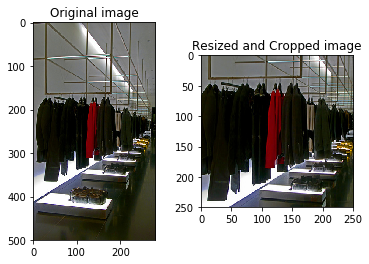

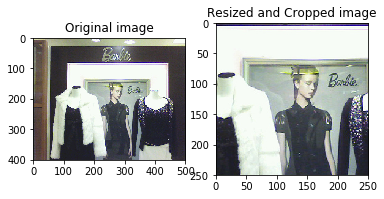

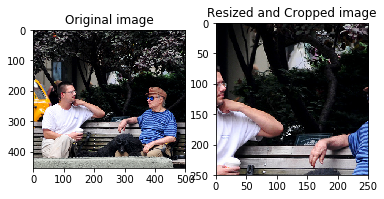

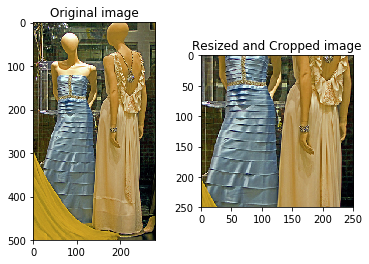

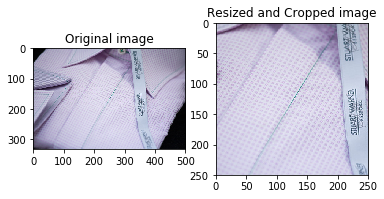

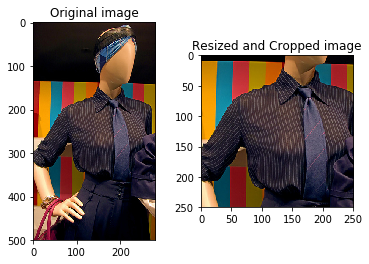

In [16]:
def crop_resize(img, display=False):
    
    width, height, _ = img.shape
    new_height = 250
    new_width = 250
    
    #crop image
    left = int((width - new_width)/2)
    right = int((width + new_width)/2)
    top = int((height - new_height)/2)
    bottom = int((height + new_height)/2)
    
    crop_img = img[left:right,top:bottom]
    
    #resize image
    resized = resize(crop_img,(new_height,new_width))
    
    if display:
        fig, axes = plt.subplots(nrows=1, ncols=2)
        ax = axes.ravel()
        ax[0].imshow(img)
        ax[0].set_title("Original image")

        ax[1].imshow(resized)
        ax[1].set_title("Resized and Cropped image")
    
    return resized

#example of crop and resize on first 3 images in men and women data
for i in range(3):
    crop_resize(men[i], display=True)
    crop_resize(women[i], display=True)


In [17]:
men_reshaped = []
women_reshaped = []

for i in range(500):
    #reshape image
    men_reshaped.append(crop_resize(men[i]).flatten())
    women_reshaped.append(crop_resize(women[i]).flatten())
    
men_arr = np.array(men_reshaped)
women_arr = np.array(women_reshaped)

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [18]:
print(men_arr.shape,women_arr.shape)

(500, 187500) (500, 187500)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

#create labels for men and women data. 1 is for men, 0 is for women.
men_label = np.ones(500)
women_label = np.zeros(500)

#
X = np.concatenate((men_arr, women_arr), axis=0)
y = np.concatenate((men_label, women_label), axis=0)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify = y)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

lda = LDA(n_components=1)  
X_lda = lda.fit_transform(X_train, y_train)  
    
svc_model = LinearSVC().fit(X_lda,y_train)
print(svc_model.score(X_lda,y_train))